**Step1. Importing/Calling Classes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**Step2. Defining Data**

In [ ]:
col_names=['country','confederation','population_share','tv_audience_share','gdp_weighted_share']
#[index_col=0] First column countries to use as an index
df= pd.read_csv('fifa_countries_audience.csv',names=col_names, index_col=0) 
# Remove first row as it contains same name as the columns in dataset
df=df.drop(df.index[0])
#To wipe-out rows which contains '0.0' to avoid data redundancy
df=df[(df!= '0.0').all(1)]
df


,confederation,population_share,tv_audience_share,gdp_weighted_share
country,,,,
United States,CONCACAF,4.5,4.3,11.3
Japan,AFC,1.9,4.9,9.1
China,AFC,19.5,14.8,7.3
Germany,UEFA,1.2,2.9,6.3
Brazil,CONMEBOL,2.8,7.1,5.4
...,...,...,...,...
Lebanon,AFC,0.1,0.1,0.1
Jordan,AFC,0.1,0.1,0.1
Honduras,CONCACAF,0.1,0.3,0.1


In [ ]:
# Use get_dummies() method to get all the dummy columns 
dummies=pd.get_dummies(df.confederation)
dummies

,AFC,CAF,CONCACAF,CONMEBOL,OFC,UEFA
country,,,,,,
United States,0,0,1,0,0,0
Japan,1,0,0,0,0,0
China,1,0,0,0,0,0
Germany,0,0,0,0,0,1
Brazil,0,0,0,1,0,0
...,...,...,...,...,...,...
Lebanon,1,0,0,0,0,0
Jordan,1,0,0,0,0,0
Honduras,0,0,1,0,0,0


In [ ]:
# concatenate dummie columns with original dataframe
merged=pd.concat([df,dummies], axis='columns')
merged

,confederation,population_share,tv_audience_share,gdp_weighted_share,AFC,CAF,CONCACAF,CONMEBOL,OFC,UEFA
country,,,,,,,,,,
United States,CONCACAF,4.5,4.3,11.3,0,0,1,0,0,0
Japan,AFC,1.9,4.9,9.1,1,0,0,0,0,0
China,AFC,19.5,14.8,7.3,1,0,0,0,0,0
Germany,UEFA,1.2,2.9,6.3,0,0,0,0,0,1
Brazil,CONMEBOL,2.8,7.1,5.4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
Lebanon,AFC,0.1,0.1,0.1,1,0,0,0,0,0
Jordan,AFC,0.1,0.1,0.1,1,0,0,0,0,0
Honduras,CONCACAF,0.1,0.3,0.1,0,0,1,0,0,0


In [ ]:
#Dropping columns to avoid 'Dummy Variable Trap' 
final =merged.drop(['confederation','OFC'], axis='columns')
final

,population_share,tv_audience_share,gdp_weighted_share,AFC,CAF,CONCACAF,CONMEBOL,UEFA
country,,,,,,,,
United States,4.5,4.3,11.3,0,0,1,0,0
Japan,1.9,4.9,9.1,1,0,0,0,0
China,19.5,14.8,7.3,1,0,0,0,0
Germany,1.2,2.9,6.3,0,0,0,0,1
Brazil,2.8,7.1,5.4,0,0,0,1,0
...,...,...,...,...,...,...,...,...
Lebanon,0.1,0.1,0.1,1,0,0,0,0
Jordan,0.1,0.1,0.1,1,0,0,0,0
Honduras,0.1,0.3,0.1,0,0,1,0,0


In [ ]:
#independent varable 
Y= final.tv_audience_share
Y

country
United States     4.3
Japan             4.9
China            14.8
Germany           2.9
Brazil            7.1
                 ... 
Lebanon           0.1
Jordan            0.1
Honduras          0.3
Turkmenistan      0.1
Angola            0.1
Name: tv_audience_share, Length: 80, dtype: object

In [ ]:
Overall_features=final.iloc[:,[0,2,3,4,5,6,7]].values
Overall_features=Overall_features.astype('float32')
print(Overall_features)
Overall_labels=final.iloc[:,1].values
Overall_labels=Overall_labels.astype('float32')
print(Overall_labels)

[[ 4.5 11.3  0.   0.   1.   0.   0. ]
 [ 1.9  9.1  1.   0.   0.   0.   0. ]
 [19.5  7.3  1.   0.   0.   0.   0. ]
 [ 1.2  6.3  0.   0.   0.   0.   1. ]
 [ 2.8  5.4  0.   0.   0.   1.   0. ]
 [ 0.9  4.2  0.   0.   0.   0.   1. ]
 [ 0.9  4.   0.   0.   0.   0.   1. ]
 [ 0.9  4.   0.   0.   0.   0.   1. ]
 [ 2.1  3.5  0.   0.   0.   0.   1. ]
 [ 0.7  3.1  0.   0.   0.   0.   1. ]
 [ 0.7  3.   1.   0.   0.   0.   0. ]
 [ 3.5  2.9  1.   0.   0.   0.   0. ]
 [ 1.7  2.6  0.   0.   1.   0.   0. ]
 [ 1.1  2.   0.   0.   0.   0.   1. ]
 [ 1.   1.6  1.   0.   0.   0.   0. ]
 [ 0.6  1.6  0.   0.   0.   1.   0. ]
 [ 0.2  1.5  0.   0.   0.   0.   1. ]
 [ 0.6  1.3  0.   0.   0.   0.   1. ]
 [ 0.4  1.2  1.   0.   0.   0.   0. ]
 [ 0.3  1.   1.   0.   0.   0.   0. ]
 [ 0.5  1.   0.   0.   1.   0.   0. ]
 [ 0.7  0.9  0.   0.   0.   1.   0. ]
 [ 0.4  0.9  0.   0.   0.   1.   0. ]
 [ 0.7  0.8  0.   1.   0.   0.   0. ]
 [ 0.4  0.7  1.   0.   0.   0.   0. ]
 [ 0.1  0.7  0.   0.   0.   0.   1. ]
 [ 2.3  0.7 

In [ ]:
Trainf,Testf,Trainl,Testl=train_test_split(Overall_features,Overall_labels,test_size=0.30,random_state=40)
Trainfc,Testfc,Trainlc,Testlc=train_test_split(Overall_features,Overall_labels,test_size=0.30,random_state=30)

**Step3.Fitting The Model**

In [ ]:
obj=LinearRegression()
obj.fit(Trainf,Trainl)
obj2=LinearRegression()
obj2.fit(Testfc,Testlc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step4. Predict The Model**

In [ ]:
results=obj.predict(Testf)
resultsc=obj2.predict(Testfc)
print(results)
print(resultsc)

[ 0.9130559   0.57003874  0.07087889  0.3110971   0.4167225   0.11574315
 11.041699    0.20547166  0.7605802   1.7813736   1.1824906   0.9461942
  0.16060741  0.2503359   7.9976597   0.31322232  0.27389944  0.28979635
  0.22903518  0.2213686   4.462061    0.29520017  1.7976315   2.306674  ]
[ 1.6471546   0.05560922  1.3518077   1.6953145   0.02902094  1.9421337
  0.18131393  0.06590504  6.220972    0.4569416   5.087075    0.33429602
  0.40000007  3.8828146   0.10878578  0.12813738  1.927218    0.6413153
  0.08219749  0.02902094  0.18680638  0.05560922  0.80990076 -0.01935224]


**Step5. Evaluating The Model**

In [ ]:
# MAE(Mean Absolute Error) of the model
MAE = mean_absolute_error(Testl, results)
MAE2 = mean_absolute_error(Testlc,resultsc)
print(MAE)
print(MAE2)

0.84213734
0.26242113


In [ ]:
# MSE(Mean Squared Error) of the model
MSE=mean_squared_error(Testl,results)
MSE2=mean_squared_error(Testlc,resultsc)
print(MSE)
print(MSE2)

4.4033384
0.14712961


In [ ]:
# RMSE(Root Mean Squared Error) of the model
RMSE=np.sqrt(mean_squared_error(Testl,results))
RMSE2=np.sqrt(mean_squared_error(Testlc,resultsc))
print(RMSE)
print(RMSE2)

2.0984132
0.38357478


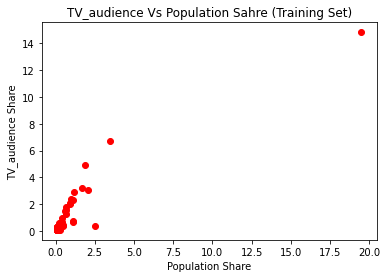

In [ ]:
#Visualization Training Set by Scatter Plot
plt.scatter(Trainf[:,0],Trainl,color='red')
plt.title('TV_audience Vs Population Sahre (Training Set)')
plt.xlabel('Population Share')
plt.ylabel('TV_audience Share')
plt.show()

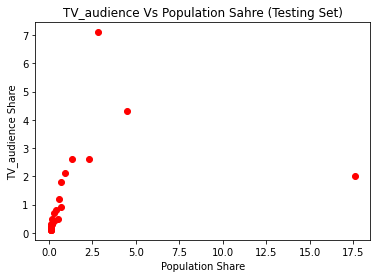

In [ ]:
#Visualization Training Set Scatter plot
plt.scatter(Testf[:,0],Testl,color='red')
plt.title('TV_audience Vs Population Sahre (Testing Set)')
plt.xlabel('Population Share')
plt.ylabel('TV_audience Share')
plt.show()

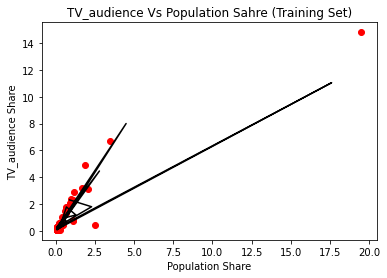

In [ ]:
##Visualization using regression lines 
plt.scatter(Trainf[:,0],Trainl,color='red')
plt.plot(Testf[:,0],results,color='black')
plt.title('TV_audience Vs Population Sahre (Training Set)')
plt.xlabel('Population Share')
plt.ylabel('TV_audience Share')
plt.show()

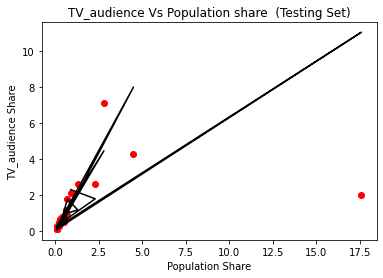

In [ ]:
#Visualization using regression lines 
plt.scatter(Testf[:,0],Testl,color='red')
plt.plot(Testf[:,0],results,color='black') 
plt.title('TV_audience Vs Population share  (Testing Set)')
plt.xlabel('Population Share')
plt.ylabel('TV_audience Share')
plt.show()
